Twitter Data Analysis

---

Use Twitter data for sentiment analysis. The dataset is 3MB in size and has 31,962 tweets. Identify the tweets which are hate tweets and which are not.

##Dataset Description

We have been provided with 31962 tweets and our aim is to predict whether the tweet is a hate tweet or not.

The dataset has two features - tweet and label

In this problem tweet is our independant variable and label is the dependant variable.

##Flowchart

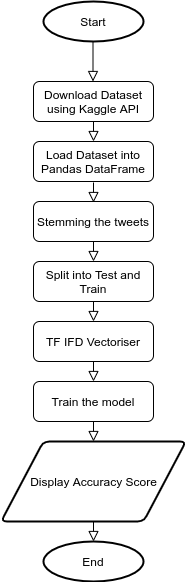

##Main Assignment

###Download dataset using Kaggle CLI

In [ ]:
#Installing Kaggle and Kaggle CLI Python Libraries
!pip install -q kaggle
!pip install -q kaggle-cli

#Use Apoorv's Kaggle Account's API token to download Kaggle Dataset to Colab
#We store this API token in "kaggle.json"
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()

#IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle
#The -p will create the directory (along with the directories that lead to the directory you want to create)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
#Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that,
#(U)ser / owner can read, can write and can't execute.
#(G)roup can't read, can't write and can't execute.
#(O)thers can't read, can't write and can't execute.
!chmod 600 ~/.kaggle/kaggle.json

#Download the dataset
!kaggle datasets download -d dv1453/twitter-sentiment-analysis-analytics-vidya

#Unzip the dataset
!unzip \twitter-sentiment-analysis-analytics-vidya.zip

#Remove Unnecessary Files
!rm -rf kaggle.json
!rm -r sample_data
!rm -r twitter-sentiment-analysis-analytics-vidya.zip

     |████████████████████████████████| 81kB 1.7MB/s 
     |████████████████████████████████| 5.3MB 5.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 133kB 49.2MB/s 
     |████████████████████████████████| 112kB 49.1MB/s 
  0% 0.00/1.93M [00:00<?, ?B/s]
100% 1.93M/1.93M [00:00<00:00, 65.0MB/s]
Archive:  twitter-sentiment-analysis-analytics-vidya.zip
  inflating: sample_submission_gfvA5FD.csv  
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
import nltk
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()

def clean_sentences(text):

    text = text.lower() #convert to lower case
    
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    
    return text

x = df['tweet']
y = df['label']

x = x.map(lambda a: clean_sentences(a))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
confusion_matrix(y_test,model.predict(x_test))

array([[7370,   60],
       [ 225,  336]])

In [ ]:
accuracy_score(y_test,model.predict(x_test))

0.9643348767363283

In [ ]:
recall_score(y_test,model.predict(x_test))

0.5989304812834224

In [ ]:
precision_score(y_test,model.predict(x_test))


0.8484848484848485

In [ ]:
f1_score(y_test,model.predict(x_test))


0.7021943573667712